<a href="https://colab.research.google.com/github/abhinav-exp/ELM_Implementaion/blob/main/ELM_ALL_ETH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EML** : *Moore-Penrose pseudoinverse vs JAYA vs TAO vs HHO*

---



## Common processes for all Moore-Penrose pseudoinverse, JAYA, TAO, HHO

###Importing All the neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###Data Collection

In [2]:
GitHubDataLink = 'https://raw.githubusercontent.com/abhinav-exp/Forecasting-CryptoCurrency-Prices/master/Datasets/'
InputFileLink = GitHubDataLink + 'DataETH.csv'
data1 = pd.read_csv(InputFileLink, header=0, index_col=0)
print(data1)

                  Price
Time                   
2017-01-01     8.177852
2017-01-02     8.378456
2017-01-03     9.697472
2017-01-04    11.068632
2017-01-05    10.224794
...                 ...
2022-12-27  1211.575582
2022-12-28  1188.107925
2022-12-29  1200.920968
2022-12-30  1198.583310
2022-12-31  1195.330879

[2191 rows x 1 columns]


### Normalisation of Data

In [3]:
data1min = data1.min()
data1max = data1.max()

normalize = lambda x: (x - data1min + 1)/(data1max - data1min + 2)
data2 = normalize(data1)
print(data2)

               Price
Time                
2017-01-01  0.000208
2017-01-02  0.000250
2017-01-03  0.000524
2017-01-04  0.000810
2017-01-05  0.000634
...              ...
2022-12-27  0.250656
2022-12-28  0.245772
2022-12-29  0.248439
2022-12-30  0.247952
2022-12-31  0.247275

[2191 rows x 1 columns]


In [4]:
denormalize = lambda x: (x)*np.float64(data1max - data1min + 2) + np.float64(data1min - 1)

### Sequence Convertion

In [5]:
def split_sequence(sequence, n_steps):
  X= list()
  for i in range(len(sequence) - n_steps):
    end_ix = i + n_steps
    seq_x= sequence.values[i:end_ix, 0]
    X.append(seq_x)
  return pd.DataFrame(X)

data3 = split_sequence(data2, 10)
print(data3.shape)
print(data3)

(2181, 10)
             0         1         2         3         4         5         6  \
0     0.000208  0.000250  0.000524  0.000810  0.000634  0.000614  0.000572   
1     0.000250  0.000524  0.000810  0.000634  0.000614  0.000572  0.000679   
2     0.000524  0.000810  0.000634  0.000614  0.000572  0.000679  0.000663   
3     0.000810  0.000634  0.000614  0.000572  0.000679  0.000663  0.000718   
4     0.000634  0.000614  0.000572  0.000679  0.000663  0.000718  0.000582   
...        ...       ...       ...       ...       ...       ...       ...   
2176  0.245559  0.245625  0.241407  0.251949  0.250823  0.251753  0.252382   
2177  0.245625  0.241407  0.251949  0.250823  0.251753  0.252382  0.252530   
2178  0.241407  0.251949  0.250823  0.251753  0.252382  0.252530  0.251948   
2179  0.251949  0.250823  0.251753  0.252382  0.252530  0.251948  0.253321   
2180  0.250823  0.251753  0.252382  0.252530  0.251948  0.253321  0.250656   

             7         8         9  
0     0.000679 

### Training and Testing Split

In [6]:
train_x = data3.iloc[:int(0.85*len(data3)), :-1]
train_y = data3.iloc[:int(0.85*len(data3)), -1:]
test_x = data3.iloc[int(0.85*len(data3)):, :-1]
test_y = data3.iloc[int(0.85*len(data3)):, -1:]
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1853, 9)
(1853, 1)
(328, 9)
(328, 1)


## Moore-Penrose pseudoinverse

### Implementing the model

In [7]:
class ELM(object):
    def __init__(self, inputSize, outputSize, hiddenSize):
        self.inputSize = inputSize
        self.outputSize = outputSize
        self.hiddenSize = hiddenSize
        self.weight = np.matrix(np.random.uniform(-0.5, 0.5, (self.hiddenSize, self.inputSize)))
        self.bias = np.matrix(np.random.uniform(0, 1, (1, self.hiddenSize)))
        self.H = 0
        self.beta = 0

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-1 * x))

    def predict(self, X):
        X = np.matrix(X)
        y = self.sigmoid((X * self.weight.T) + self.bias) * self.beta
        return y

    def train(self, X, y):
        X = np.matrix(X)
        y = np.matrix(y)
        self.H = (X * self.weight.T) + self.bias
        self.H = self.sigmoid(self.H)
        H_moore_penrose = np.linalg.inv(self.H.T * self.H) * self.H.T
        self.beta = H_moore_penrose * y
        return self.H * self.beta

In [8]:
elm = ELM(9, 1, 10)
elm.train(train_x,train_y)
pred_y_MPP = elm.predict(test_x)

### Prediction

In [9]:
pred_y_MPP[:, 0]

matrix([[0.62958846],
        [0.64055652],
        [0.65561717],
        [0.64702433],
        [0.68307961],
        [0.64733825],
        [0.60774246],
        [0.61030581],
        [0.59818297],
        [0.61518519],
        [0.65996774],
        [0.65019309],
        [0.60519815],
        [0.58292844],
        [0.57312509],
        [0.55589777],
        [0.54122246],
        [0.54274184],
        [0.53807231],
        [0.54455894],
        [0.58036548],
        [0.57778273],
        [0.54988624],
        [0.60728781],
        [0.61682857],
        [0.62102926],
        [0.59821327],
        [0.53809893],
        [0.56026133],
        [0.53856564],
        [0.51922919],
        [0.53772707],
        [0.56193266],
        [0.54882879],
        [0.53669481],
        [0.53553978],
        [0.52566096],
        [0.54570322],
        [0.54524232],
        [0.57334807],
        [0.59068356],
        [0.61255884],
        [0.61768828],
        [0.5980441 ],
        [0.60780891],
        [0

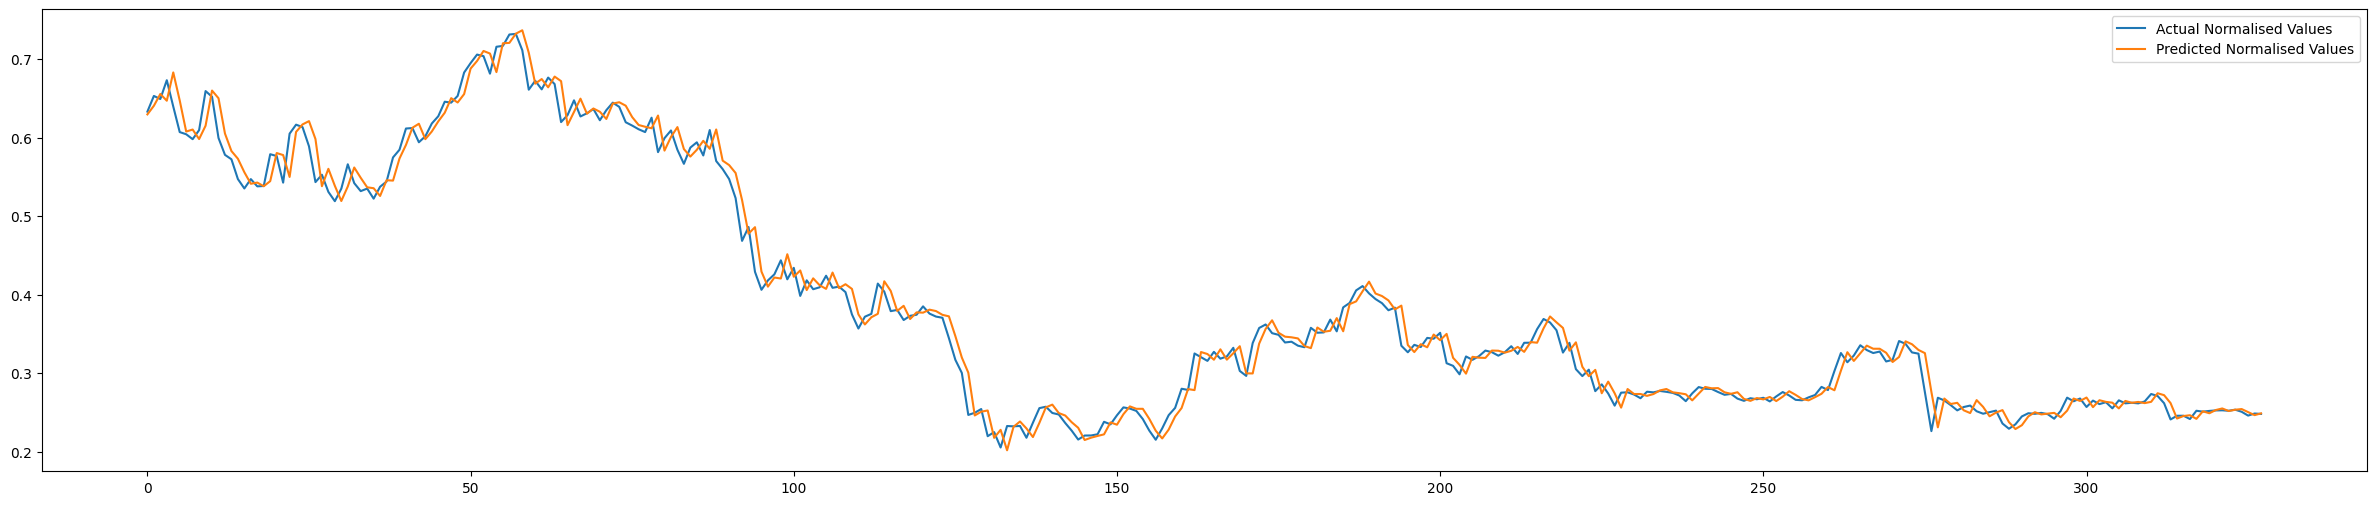

In [10]:
plt.figure(figsize=(30, 6))
plt.plot(test_y.reset_index()[9])
plt.plot(pred_y_MPP)
plt.legend(["Actual Normalised Values", "Predicted Normalised Values"])
plt.show()

In [11]:
denormalized_preds_MPP = denormalize(pred_y_MPP)
# print(denormalized_preds)
preds1_MPP = pd.DataFrame(denormalized_preds_MPP)
preds1_MPP['DATE'] = data1.index[-1*len(preds1_MPP):]
preds1_MPP = preds1_MPP.set_index('DATE')
print(preds1_MPP)

                      0
DATE                   
2022-02-07  3032.336914
2022-02-08  3085.038206
2022-02-09  3157.404317
2022-02-10  3116.115915
2022-02-11  3289.360783
...                 ...
2022-12-27  1224.076651
2022-12-28  1228.189731
2022-12-29  1209.316486
2022-12-30  1191.041213
2022-12-31  1201.739467

[328 rows x 1 columns]


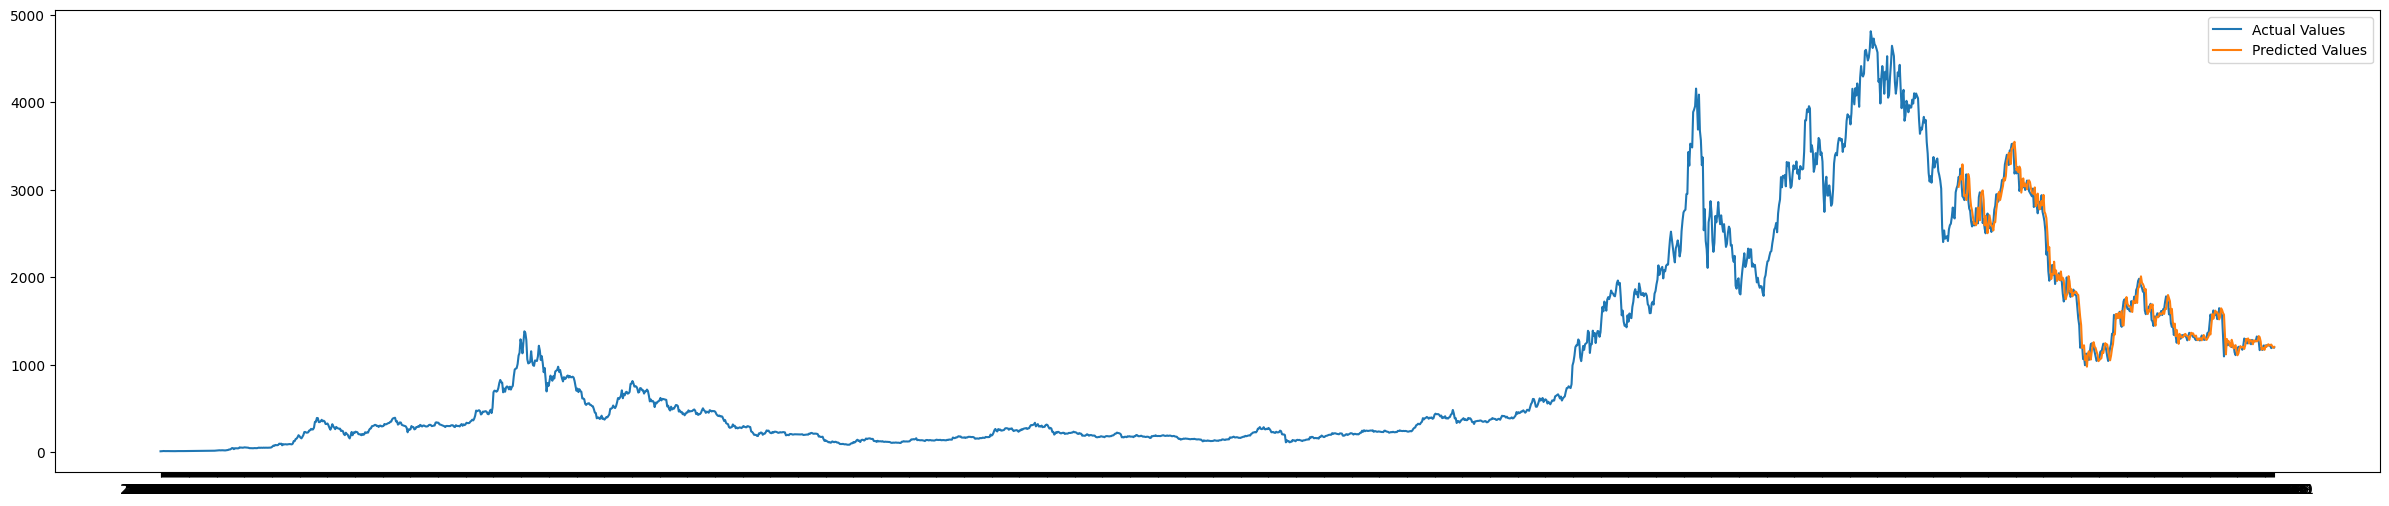

In [12]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1_MPP)
plt.legend(["Actual Values", "Predicted Values"])
plt.show()

### Errors

In [13]:
mse_MPP = np.mean((np.array(preds1_MPP[0]) - np.array(data1.iloc[-1*(len(preds1_MPP)):, 0]))**2)
print("mse  "+ str(mse_MPP))
print("rmse "+ str(np.sqrt(mse_MPP)))

mse  14473.277444438754
rmse 120.30493524556154


In [14]:
np.array(test_y - pred_y_MPP)[:, 0]

array([ 3.54533876e-03,  1.25568655e-02, -6.40376742e-03,  2.61412290e-02,
       -4.34539501e-02, -4.02798518e-02, -3.44042619e-03, -1.22763718e-02,
        1.14181631e-02,  4.41476859e-02, -7.86314817e-03, -5.06471488e-02,
       -2.71434558e-02, -1.05185292e-02, -2.59403208e-02, -2.06832473e-02,
        5.92907219e-03, -4.83844417e-03,  3.01347402e-04,  3.43015424e-02,
       -3.77470873e-03, -3.51571553e-02,  5.51710248e-02,  9.23040345e-03,
       -3.40669424e-03, -3.21034207e-02, -5.48925008e-02,  1.46003432e-02,
       -2.94106187e-02, -1.95575445e-02,  1.57548753e-02,  2.83094618e-02,
       -1.99461532e-02, -1.69993396e-02, -1.62390344e-03, -1.33076756e-02,
        1.17399247e-02, -1.67183259e-03,  2.95235377e-02,  1.12316954e-02,
        2.09172094e-02, -3.49995065e-04, -2.35883522e-02,  3.65155139e-03,
        1.01869667e-02,  6.55825829e-03,  1.40344415e-02, -5.69018804e-03,
        8.40221520e-03,  2.74616708e-02,  7.01805728e-03,  8.15101657e-03,
       -6.61966628e-03, -

In [15]:
err_test_MPP = np.array(test_y - pred_y_MPP)[:, 0]
mse_test_MPP = np.mean(err_test_MPP ** 2)
rmse_test_MPP = np.sqrt(mse_test_MPP)
mae_test_MPP = np.mean(np.abs(err_test_MPP))
mape_test_MPP = np.mean(np.abs(err_test_MPP) / np.array(test_y)[:, 0])
MPPN = pd.DataFrame([[mse_test_MPP, rmse_test_MPP, mae_test_MPP, mape_test_MPP]], columns = ["mse", "rmse", "mae", "mape"], index = ['MPPN'])
MPPN

,mse,rmse,mae,mape
MPPN,0.000314,0.017717,0.012726,0.034043


## Jaya Optimisation

### Implementing the model

In [53]:
class JAYA_ELM():
  def __init__(self, p_size):
    self.p_size = p_size
    self.no_hidden_nodes = 10
    self.weight = np.random.uniform(-0.5, 0.5, (self.p_size, 9, self.no_hidden_nodes))
    self.bias = np.random.uniform(0, 1, (self.p_size, self.no_hidden_nodes))
    self.beta = np.random.uniform(-0.5, 0.5, (self.p_size, self.no_hidden_nodes, 1))
    self.train_px = np.tile(np.expand_dims(train_x, axis = 0), (p_size, 1, 1))
    self.train_py = np.tile(np.expand_dims(train_y, axis = 0), (p_size, 1, 1))
    preds = self.forward_function(self.weight, self.bias, self.beta, self.train_px)
    error = (preds - self.train_py) ** 2
    self.mse = np.mean(error, axis = 1)
    self.best = np.argmin(self.mse)
    self.worst = np.argmax(self.mse)
    self.best_error_graph = np.array([np.sum(self.mse)])

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-1 * x))

  def forward_function(self, weight, bias, beta, X):
    # print("x", X.shape)
    # print("w", weight.shape)
    a = np.matmul(X, weight)
    # print("h", a.shape)
    # print("b", bias.shape)
    # print(len(bias.shape))
    c = np.expand_dims(bias, axis = len(bias.shape) - 1)
    # print("c", c.shape)
    b = a + c
    return self.sigmoid(np.matmul(b, beta))

  def optimise(self, gen):
    for i in range(gen):
      r0 = np.random.random((self.p_size, self.no_hidden_nodes, 1))
      r1 = np.random.random((self.p_size, self.no_hidden_nodes, 1))
      new_beta = self.beta
      new_beta += r0 * (self.beta[self.best] - self.beta)
      new_beta -= r1 * (self.beta[self.worst] - self.beta)
      new_pred = self.forward_function(self.weight, self.bias, new_beta, self.train_px)
      new_error = (new_pred - self.train_py) ** 2
      new_mse = np.mean(new_error, axis = 1)
      cond = new_mse < self.mse
      self.beta = np.where(np.expand_dims(cond, axis = 1), new_beta, self.beta)
      self.mse = np.where(cond, new_mse, self.mse)
      self.best = np.argmin(self.mse)
      self.worst = np.argmax(self.mse)
      self.best_error_graph = np.append(self.best_error_graph, np.array([np.sum(self.mse)]))



### Convergence Curve

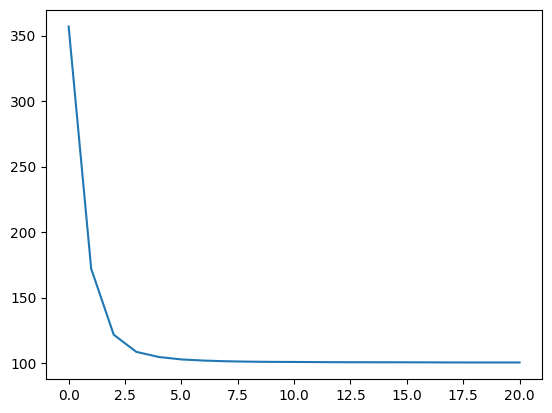

In [54]:
optimiser = JAYA_ELM(2000)
optimiser.optimise(20)
ec_Jaya = optimiser.best_error_graph
plt.plot(ec_Jaya)
preds_train_Jaya = optimiser.forward_function(optimiser.weight[optimiser.best], optimiser.bias[optimiser.best], optimiser.beta[optimiser.best],  train_x)


In [55]:
print(preds_train_Jaya.shape)
# print(np.array(train_y)[:, 0])
# print(np.array(preds_train)[:, 0])
error_train_Jaya = (np.array(train_y)[:, 0] - np.array(preds_train_Jaya)[:, 0])
# print(error_train)
print(np.mean((error_train_Jaya) ** 2))

(1853, 1)
0.00791863989111286


### Prediction

In [56]:
preds_Jaya = optimiser.forward_function(optimiser.weight[optimiser.best], optimiser.bias[optimiser.best], optimiser.beta[optimiser.best], test_x)
print(preds_Jaya.shape)
error_test_Jaya = (np.array(test_y)[:, 0] - np.array(preds_Jaya)[:, 0])
print(np.mean(error_test_Jaya ** 2))

(328, 1)
0.02817057470134118


In [57]:
np.array(preds_Jaya)[:, 0]

array([0.63609829, 0.69493458, 0.72745689, 0.72192689, 0.76690608,
       0.75336454, 0.75063054, 0.75374702, 0.7231906 , 0.73902233,
       0.76569324, 0.75709691, 0.7480685 , 0.72706665, 0.67958043,
       0.65377865, 0.64898431, 0.63381357, 0.60624269, 0.60142669,
       0.61040948, 0.59262291, 0.59213262, 0.64150652, 0.62079249,
       0.66489529, 0.67916969, 0.62501163, 0.63949395, 0.59239323,
       0.58531018, 0.59893546, 0.58821905, 0.57587431, 0.57445118,
       0.55253821, 0.5238956 , 0.54981397, 0.5446525 , 0.57692684,
       0.59908932, 0.62836888, 0.64650696, 0.64808595, 0.67163875,
       0.67779627, 0.7010103 , 0.73649031, 0.74263751, 0.76103975,
       0.78387106, 0.79457966, 0.82281177, 0.83416879, 0.83065786,
       0.85383527, 0.85069443, 0.87072118, 0.88174698, 0.87270276,
       0.86146528, 0.85685681, 0.8356875 , 0.84523174, 0.84288632,
       0.80986963, 0.81155243, 0.7866927 , 0.76946207, 0.78857842,
       0.77040216, 0.75575004, 0.76947093, 0.75922685, 0.76156

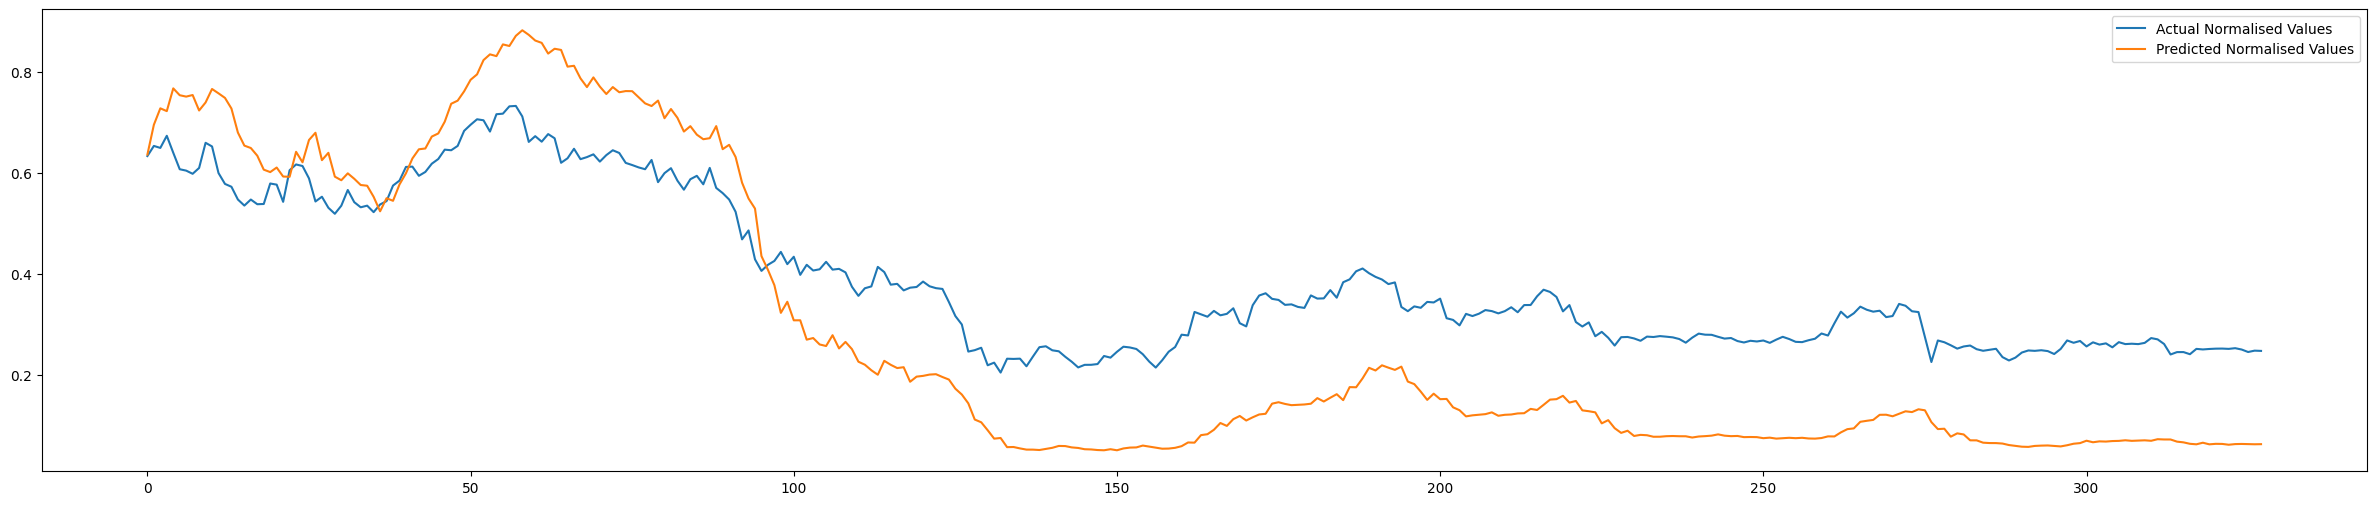

In [58]:
plt.figure(figsize=(30, 6))
plt.plot(test_y.reset_index()[9])
plt.plot(np.array(preds_Jaya)[:, 0])
plt.legend(["Actual Normalised Values", "Predicted Normalised Values"])
plt.show()

In [59]:
denormalized_preds_Jaya = denormalize(preds_Jaya)
# print(denormalized_preds)
preds1_Jaya = pd.DataFrame(denormalized_preds_Jaya)
preds1_Jaya['DATE'] = data1.index[-1*len(preds1_Jaya):]
preds1_Jaya = preds1_Jaya.set_index('DATE')
print(preds1_Jaya)

                      0
DATE                   
2022-02-07  3063.616551
2022-02-08  3346.323654
2022-02-09  3502.592666
2022-02-10  3476.021123
2022-02-11  3692.145175
...                 ...
2022-12-27   313.427062
2022-12-28   314.780649
2022-12-29   313.311108
2022-12-30   311.705458
2022-12-31   312.736931

[328 rows x 1 columns]


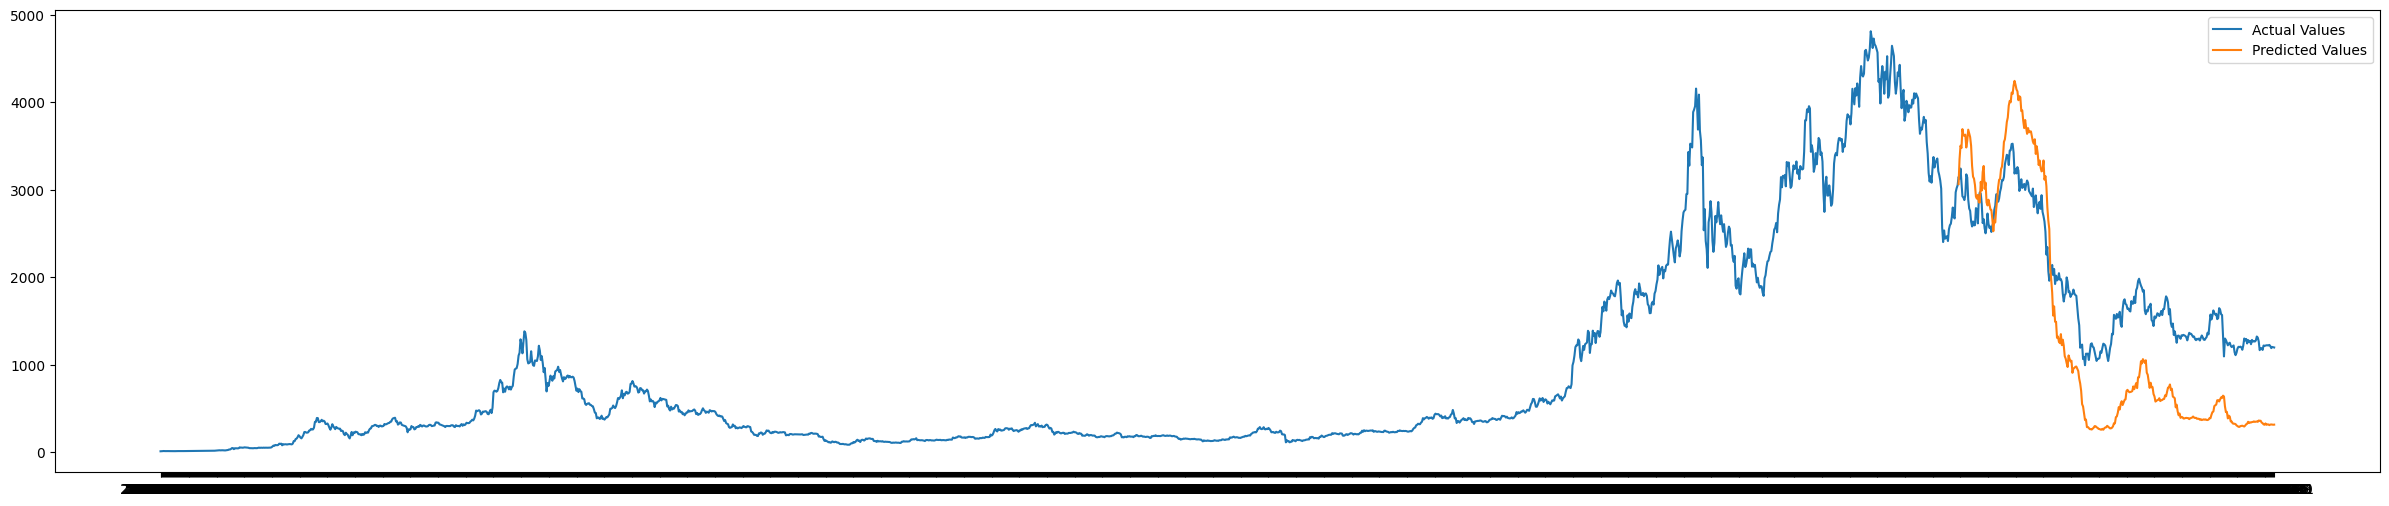

In [60]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1_Jaya)
plt.legend(["Actual Values", "Predicted Values"])
plt.show()

### Errors

In [61]:
mse_Jaya = np.mean((np.array(preds1_Jaya[0]) - np.array(data1.iloc[-1*(len(preds1_Jaya)):, 0]))**2)
print("mse  "+ str(mse_Jaya))
print("rmse "+ str(np.sqrt(mse_Jaya)))

mse  657936.8873635367
rmse 811.1330885641004


In [62]:
(np.array(test_y) - np.array(preds_Jaya))[:, 0]

array([-0.0029645 , -0.0418212 , -0.07824349, -0.04876133, -0.12728042,
       -0.14630614, -0.14632852, -0.15571758, -0.11358947, -0.07968946,
       -0.11358865, -0.15755096, -0.17001381, -0.15465674, -0.13239566,
       -0.11856413, -0.10183278, -0.09591018, -0.06786903, -0.0225662 ,
       -0.03381871, -0.04999734,  0.01292464, -0.02498831, -0.00737061,
       -0.07596945, -0.13584893, -0.07231235, -0.10864324, -0.07338513,
       -0.05032611, -0.03289893, -0.04623254, -0.04404486, -0.03938027,
       -0.03030611,  0.01350528, -0.00578258,  0.03011336,  0.00765293,
        0.01251146, -0.01616003, -0.05240703, -0.0463903 , -0.05364288,
       -0.05054076, -0.05524349, -0.09189271, -0.08946855, -0.07808943,
       -0.08890387, -0.08875045, -0.11898521, -0.15266531, -0.1148707 ,
       -0.13691476, -0.11929581, -0.13851645, -0.17036462, -0.2116123 ,
       -0.18903544, -0.19533708, -0.1591423 , -0.17697613, -0.22308735,
       -0.18119312, -0.16402376, -0.1597161 , -0.1384188 , -0.15

In [63]:
err_test_Jaya = (np.array(test_y) - np.array(preds_Jaya))[:, 0]
mse_test_Jaya = np.mean(err_test_Jaya ** 2)
rmse_test_Jaya = np.sqrt(mse_test_Jaya)
mae_test_Jaya = np.mean(np.abs(err_test_Jaya))
mape_test_Jaya = np.mean(np.abs(err_test_Jaya) / np.array(test_y)[:, 0])
EJYN = pd.DataFrame([[mse_test_Jaya, rmse_test_Jaya, mae_test_Jaya, mape_test_Jaya]], columns = ["mse", "rmse", "mae", "mape"], index = ['Jaya'])
EJYN

,mse,rmse,mae,mape
Jaya,0.028171,0.167841,0.158789,0.494879


## TAO (Teamwork Optimisation)

### Implementing the model

In [27]:
class TAO_ELM():
  def __init__(self, p_size):
    self.p_size = p_size
    self.no_hidden_nodes = 10
    self.weight = np.random.uniform(-0.5, 0.5, (self.p_size, 9, self.no_hidden_nodes))
    self.bias = np.random.uniform(0, 1, (self.p_size, self.no_hidden_nodes))
    self.beta = np.random.uniform(-0.5, 0.5, (self.p_size, self.no_hidden_nodes, 1))
    self.train_px = np.tile(np.expand_dims(train_x, axis = 0), (p_size, 1, 1))
    self.train_py = np.tile(np.expand_dims(train_y, axis = 0), (p_size, 1, 1))
    preds = self.forward_function(self.weight, self.bias, self.beta, self.train_px)
    error = (preds - self.train_py) ** 2
    self.mse = np.mean(error, axis = 1)
    self.supervisor = np.argmin(self.mse)
    self.best_error_graph = np.array([np.min(self.mse)])

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-1 * x))

  def forward_function(self, weight, bias, beta, X):
    a = np.matmul(X, weight)
    c = np.expand_dims(bias, axis = len(bias.shape) - 1)
    b = a + c
    return self.sigmoid(np.matmul(b, beta))

  def forward_propagation(self, weight, bias, new_beta):
    preds = self.forward_function(weight, bias, new_beta, self.train_px)
    error = (preds - self.train_py) ** 2
    new_obj = np.mean(error, axis = 1)
    cond = (new_obj < self.mse)
    self.beta = np.where(np.expand_dims(cond, axis = 1), new_beta, self.beta)
    self.mse = np.where(cond, new_obj, self.mse)
    self.supervisor = np.argmin(self.mse)

  def optimise(self, gen):
    for i in range(gen):

      # supervisor guidance
      r = np.random.random((self.p_size, self.no_hidden_nodes, 1))
      I = np.round_(r)
      S = self.beta[self.supervisor]
      new_beta = self.beta + r * (S - I * self.beta)
      self.forward_propagation(self.weight, self.bias, new_beta)

      #information sharing
      cmp_better = self.mse.T >= self.mse
      cmp_better = np.expand_dims(cmp_better, axis = [2, 3])
      cnt_better = cmp_better.sum(axis = 1)

      SB = np.tile(np.expand_dims(self.beta, axis = 0), (self.p_size, 1, 1, 1))
      # print("SB", SB.shape)
      SB = np.where(cmp_better, SB, np.zeros(SB.shape))
      SB = SB.sum(axis = 1)/cnt_better

      preds = self.forward_function(self.weight, self.bias, SB, self.train_px)
      error = (preds - self.train_py) ** 2
      S_obj = np.mean(error, axis = 1)
      SGN = np.expand_dims(np.sign(self.mse - S_obj), axis = 2)

      r = np.random.random((self.p_size, self.no_hidden_nodes, 1))
      I = np.round_(r)
      beta = self.beta + r * (SB - I * self.beta) * SGN
      self.forward_propagation(self.weight, self.bias, beta)

      #individual activity
      r = np.random.random((self.p_size, self.no_hidden_nodes, 1))
      new_beta = self.beta + (-1*0.01 + r * 0.02) * self.beta
      self.forward_propagation(self.weight, self.bias, new_beta)

      # best error curve
      self.best_error_graph = np.append(self.best_error_graph, np.array([np.min(self.mse)]))



### Convergence Curve

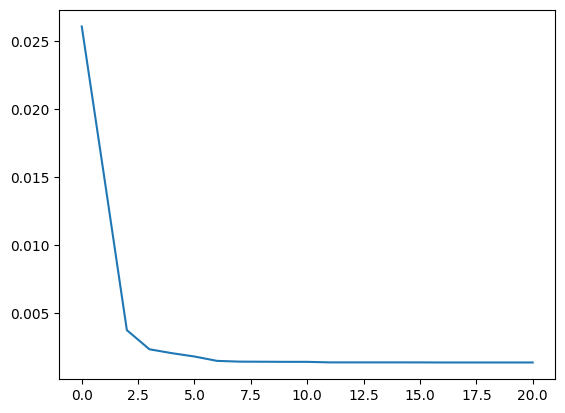

In [28]:
optimiser = TAO_ELM(2000)
optimiser.optimise(20)
ec_Tao = optimiser.best_error_graph
plt.plot(ec_Tao)
preds_train_Tao = optimiser.forward_function(optimiser.weight[optimiser.supervisor], optimiser.bias[optimiser.supervisor], optimiser.beta[optimiser.supervisor],  train_x)

In [29]:
print(preds_train_Tao.shape)
# print(np.array(train_y)[:, 0])
# print(np.array(preds_train)[:, 0])
error_train_Tao = (np.array(train_y)[:, 0] - np.array(preds_train_Tao)[:, 0])
# print(error_train)
print(np.mean((error_train_Tao) ** 2))

(1853, 1)
0.0013998585220811354


### Prediction

In [30]:
preds_Tao = optimiser.forward_function(optimiser.weight[optimiser.supervisor], optimiser.bias[optimiser.supervisor], optimiser.beta[optimiser.supervisor], test_x)
print(preds_Tao.shape)
error_test_Tao = (np.array(test_y)[:, 0] - np.array(preds_Tao)[:, 0])
print(np.mean(error_test_Tao ** 2))

(328, 1)
0.003438899220441759


In [31]:
np.array(preds_Tao)[:, 0]

array([0.63323813, 0.66191878, 0.68234984, 0.6828117 , 0.71219002,
       0.72212468, 0.69224411, 0.66699962, 0.63861791, 0.63587236,
       0.64628336, 0.65771332, 0.65090635, 0.63739659, 0.61470375,
       0.59875229, 0.57317368, 0.53616096, 0.5120327 , 0.51762597,
       0.54316418, 0.56268663, 0.56947884, 0.59166805, 0.61715436,
       0.64018696, 0.65415596, 0.60351739, 0.58754917, 0.57296695,
       0.54256142, 0.51987092, 0.51271061, 0.5319915 , 0.53422125,
       0.5364916 , 0.52684197, 0.54308197, 0.54372425, 0.54794048,
       0.57518018, 0.60226611, 0.63497563, 0.63857669, 0.64944489,
       0.65107898, 0.66180385, 0.67309293, 0.67659683, 0.68204946,
       0.70753781, 0.72969656, 0.74835261, 0.75685917, 0.75065356,
       0.75775077, 0.76809265, 0.77215415, 0.78088273, 0.76736348,
       0.75505033, 0.73474085, 0.72343843, 0.7081196 , 0.70876465,
       0.6698531 , 0.65946376, 0.66299406, 0.66709443, 0.66624826,
       0.6547391 , 0.64746262, 0.66391682, 0.67293089, 0.67147

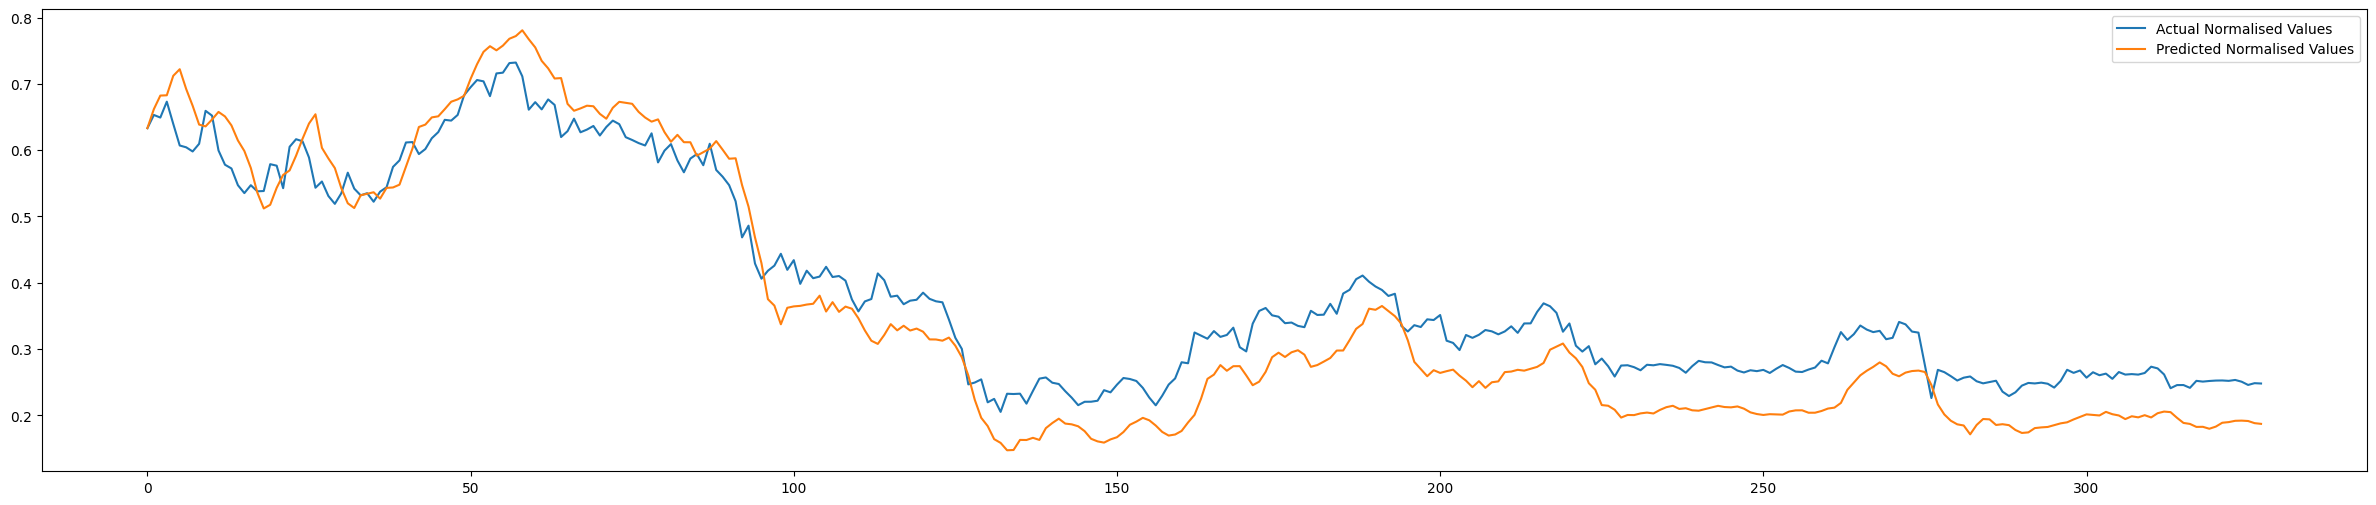

In [32]:
plt.figure(figsize=(30, 6))
plt.plot(test_y.reset_index()[9])
plt.plot(np.array(preds_Tao)[:, 0])
plt.legend(["Actual Normalised Values", "Predicted Normalised Values"])
plt.show()

In [33]:
denormalized_preds_Tao = denormalize(preds_Tao)
# print(denormalized_preds)
preds1_Tao = pd.DataFrame(denormalized_preds_Tao)
preds1_Tao['DATE'] = data1.index[-1*len(preds1_Tao):]
preds1_Tao = preds1_Tao.set_index('DATE')
print(preds1_Tao)

                      0
DATE                   
2022-02-07  3049.873530
2022-02-08  3187.683422
2022-02-09  3285.854227
2022-02-10  3288.073466
2022-02-11  3429.235677
...                 ...
2022-12-27   928.162054
2022-12-28   929.481473
2022-12-29   926.704510
2022-12-30   911.182963
2022-12-31   906.055327

[328 rows x 1 columns]


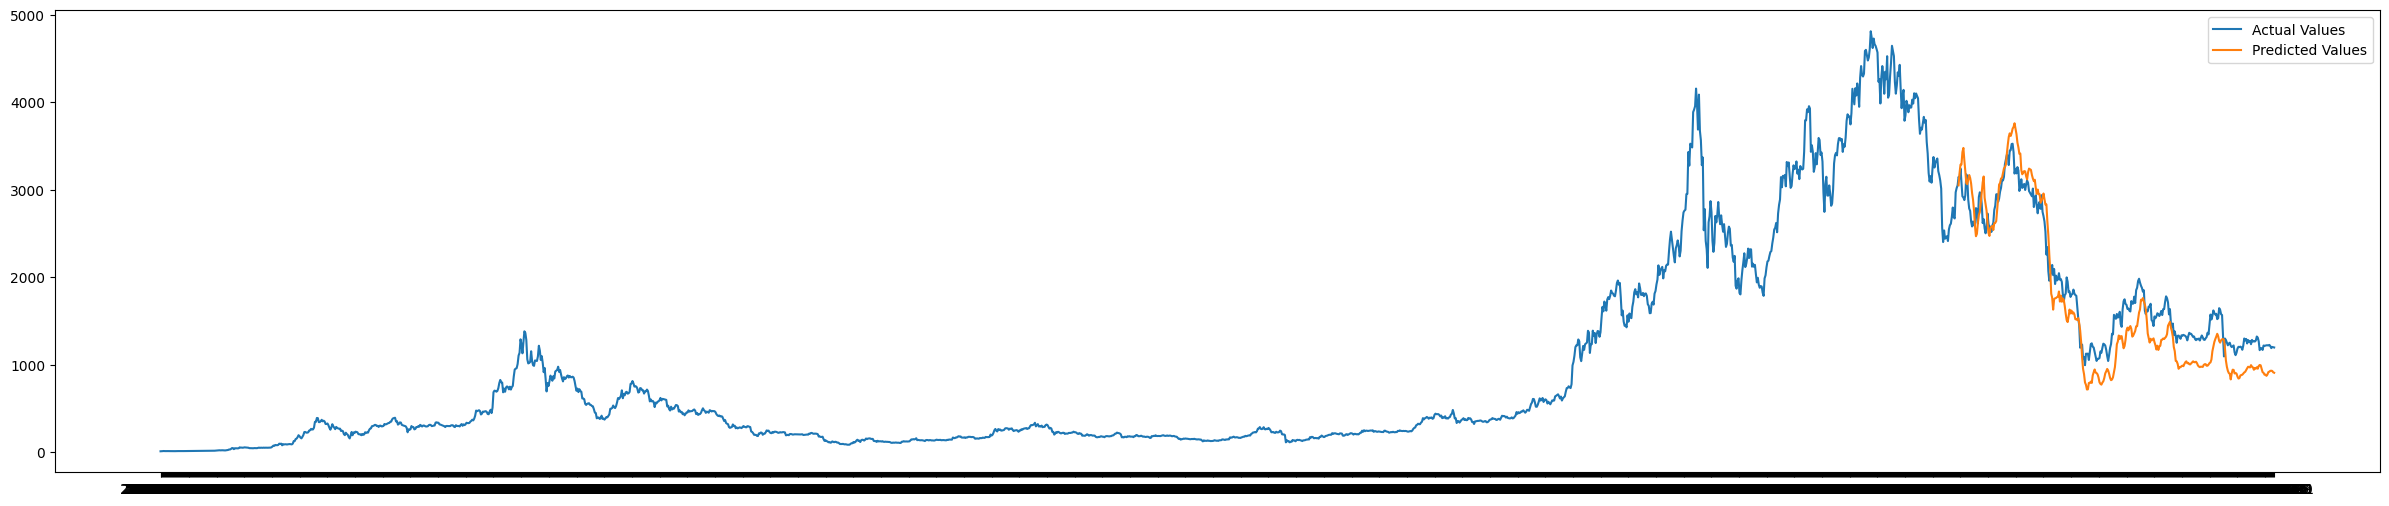

In [34]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1_Tao)
plt.legend(["Actual Values", "Predicted Values"])
plt.show()

### Errors

In [35]:
mse_Tao = np.mean((np.array(preds1_Tao[0]) - np.array(data1.iloc[-1*(len(preds1_Tao)):, 0]))**2)
print("mse  "+ str(mse_Tao))
print("rmse "+ str(np.sqrt(mse_Tao)))

mse  86163.05290149196
rmse 293.53543721583594


In [36]:
(np.array(test_y) - np.array(preds_Tao))[:, 0]

array([-1.04337349e-04, -8.80539732e-03, -3.31364378e-02, -9.64614195e-03,
       -7.25643595e-02, -1.15066279e-01, -8.79420836e-02, -6.89701818e-02,
       -2.90167724e-02,  2.34605128e-02,  5.82123737e-03, -5.81673705e-02,
       -7.28516598e-02, -6.49866781e-02, -6.75189844e-02, -6.35377724e-02,
       -2.60221534e-02,  1.74243295e-03,  2.63409608e-02,  6.12345121e-02,
        3.34265966e-02, -2.00610534e-02,  3.55784210e-02,  2.48501622e-02,
       -3.73248222e-03, -5.12611177e-02, -1.10835195e-01, -5.08181159e-02,
       -5.66984607e-02, -5.39588526e-02, -7.57734724e-03,  4.61656093e-02,
        2.92758903e-02, -1.62051073e-04,  8.49662616e-04, -1.42594940e-02,
        1.05589142e-02,  9.49411357e-04,  3.10416151e-02,  3.66392819e-02,
        3.64205897e-02,  9.94273763e-03, -4.08757065e-02, -3.68810367e-02,
       -3.14490111e-02, -2.38234642e-02, -1.60370382e-02, -2.84953291e-02,
       -2.34278729e-02,  9.00851515e-04, -1.25706141e-02, -2.38673539e-02,
       -4.45260542e-02, -

In [37]:
err_test_Tao = (np.array(test_y) - np.array(preds_Tao))[:, 0]
mse_test_Tao = np.mean(err_test_Tao ** 2)
rmse_test_Tao = np.sqrt(mse_test_Tao)
mae_test_Tao = np.mean(np.abs(err_test_Tao))
mape_test_Tao = np.mean(np.abs(err_test_Tao) / np.array(test_y)[:, 0])
ETAON = pd.DataFrame([[mse_test_Tao, rmse_test_Tao, mae_test_Tao, mape_test_Tao]], columns = ["mse", "rmse", "mae", "mape"], index = ['TAON'])
ETAON

,mse,rmse,mae,mape
TAON,0.003439,0.058642,0.053592,0.164856


## HHO (Harris Hawk Optimisation)

### Implementing the model

In [38]:
class HHO_ELM():
  def __init__(self, p_size):
    self.p_size = p_size
    self.no_hidden_nodes = 5
    self.weight = np.random.uniform(-1, 1, (self.p_size, 9, self.no_hidden_nodes))
    self.bias = np.random.uniform(-1, 1, (self.p_size, self.no_hidden_nodes))
    self.beta = np.random.uniform(-1, 1, (self.p_size, self.no_hidden_nodes, 1))
    self.train_px = np.tile(np.expand_dims(train_x, axis = 0), (p_size, 1, 1))
    self.train_py = np.tile(np.expand_dims(train_y, axis = 0), (p_size, 1, 1))
    self.fitness = np.zeros([self.p_size, 1]) + -1 * np.Inf
    self.forward_propagation(self.beta)
    self.best_error_graph = np.array([-1 * np.max(self.fitness)])

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-1 * x))

  def forward_function(self, weight, bias, beta, X):
    a = np.matmul(X, weight)
    c = np.expand_dims(bias, axis = len(bias.shape) - 1)
    b = a + c
    return self.sigmoid(np.matmul(b, beta))

  def forward_propagation(self, new_beta):
    preds = self.forward_function(self.weight, self.bias, new_beta, self.train_px)
    error = (preds - self.train_py) ** 2
    new_fitness = -np.mean(error, axis = 1)
    cond = new_fitness > self.fitness
    self.beta = np.where(np.expand_dims(cond, axis = 1), new_beta, self.beta)
    self.fitness = np.where(cond, new_fitness, self.fitness)

    sorted_indices = np.argsort(self.fitness[:, 0])
    self.weight = self.weight[sorted_indices]
    self.bias = self.bias[sorted_indices]
    self.beta = self.beta[sorted_indices]
    self.fitness = self.fitness[sorted_indices]

  def optimise(self, gen):
    for i in range(gen):
      half_size = int(np.floor(self.p_size / 2))

      r1 = np.random.uniform(size = (self.p_size, self.no_hidden_nodes, 1))
      r2 = np.random.uniform(size = (self.p_size, self.no_hidden_nodes, 1))
      A1 = 2 * r1 - 1
      C1 = 2 * r2

      C2 = self.beta.copy()
      C2[half_size:] = self.beta[0].copy()

      A2 = self.beta.copy()
      A2[:half_size] = self.beta[half_size].copy()

      new_beta = self.beta + np.abs(C1 * C2 - A1 * A2)
      new_beta[new_beta < -1] = -1
      new_beta[new_beta > 1] = 1
      self.forward_propagation(new_beta)
      # print(self.fitness[:, 0])

      self.best_error_graph = np.append(self.best_error_graph, np.array([-1 * np.max(self.fitness)]))


### Convergence Curve

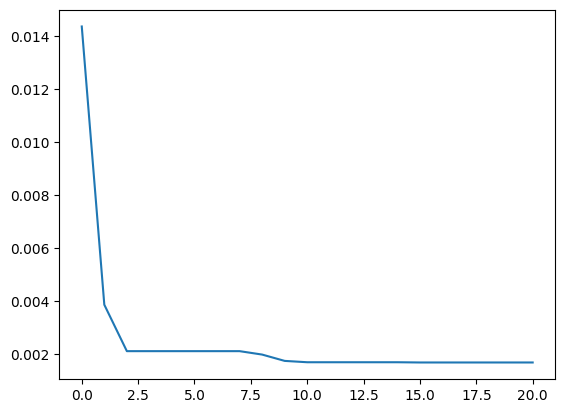

In [39]:
optimiser = HHO_ELM(2000)
optimiser.optimise(20)
ec_HHO = optimiser.best_error_graph
plt.plot(ec_HHO)
preds_train_HHO = optimiser.forward_function(optimiser.weight[-1], optimiser.bias[-1], optimiser.beta[-1],  train_x)



In [40]:
print(preds_train_HHO.shape)
# print(np.array(train_y)[:, 0])
# print(np.array(preds_train)[:, 0])
error_train_HHO = (np.array(train_y)[:, 0] - np.array(preds_train_HHO)[:, 0])
# print(error_train)
print(np.mean((error_train_HHO) ** 2))

(1853, 1)
0.0016788866355392316


### Prediction

In [41]:
preds_HHO = optimiser.forward_function(optimiser.weight[-1], optimiser.bias[-1], optimiser.beta[-1], test_x)
print(preds_HHO.shape)
error_test_HHO = (np.array(test_y)[:, 0] - np.array(preds_HHO)[:, 0])
print(np.mean(error_test_HHO ** 2))

(328, 1)
0.003664013426534981


In [42]:
np.array(preds_HHO)[:, 0]

array([0.58688343, 0.62851904, 0.63051084, 0.64395851, 0.68487632,
       0.6531332 , 0.66121806, 0.6695894 , 0.64621905, 0.66507242,
       0.66477246, 0.67245751, 0.68935572, 0.66140526, 0.62630366,
       0.62016053, 0.59717523, 0.58465765, 0.59886129, 0.59778089,
       0.57851371, 0.57501263, 0.58681673, 0.58651832, 0.5759054 ,
       0.62208043, 0.60872176, 0.58265272, 0.61738156, 0.56472772,
       0.56163479, 0.57245737, 0.56834643, 0.58509272, 0.5684282 ,
       0.54706396, 0.54334708, 0.54839514, 0.52532116, 0.55769831,
       0.57718681, 0.58438702, 0.59958055, 0.60095897, 0.61175227,
       0.60599421, 0.62800487, 0.645959  , 0.65207581, 0.67784391,
       0.68639757, 0.68849733, 0.71357412, 0.71924419, 0.72480255,
       0.7425624 , 0.73214314, 0.75531011, 0.7645823 , 0.76124534,
       0.76729977, 0.74669849, 0.72873059, 0.74109763, 0.73522848,
       0.7205198 , 0.73229949, 0.69555126, 0.69052761, 0.69631527,
       0.67422141, 0.69029835, 0.69004097, 0.66213097, 0.67958

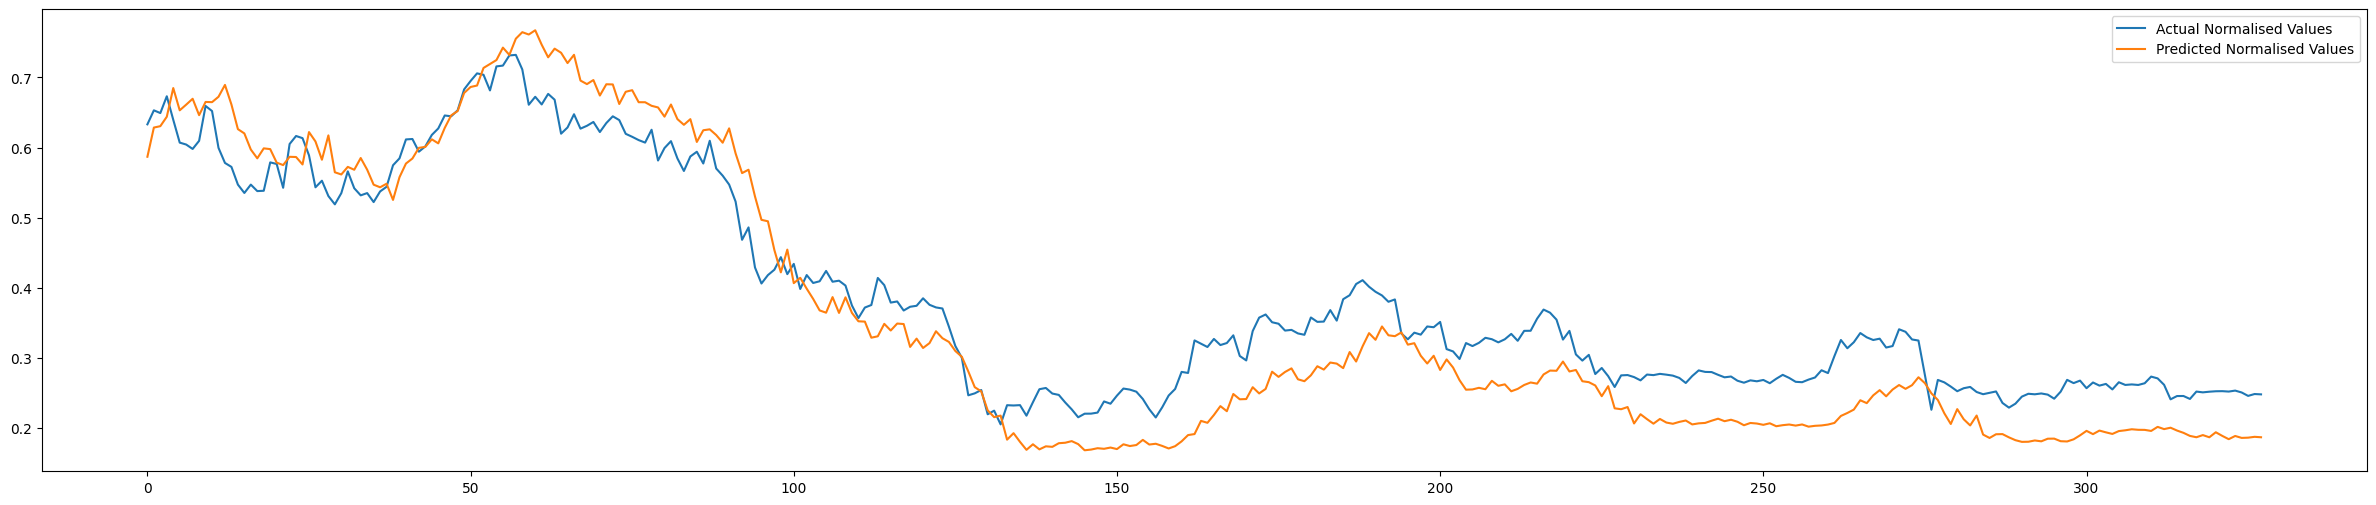

In [43]:
plt.figure(figsize=(30, 6))
plt.plot(test_y.reset_index()[9])
plt.plot(np.array(preds_HHO)[:, 0])
plt.legend(["Actual Normalised Values", "Predicted Normalised Values"])
plt.show()

In [44]:
denormalized_preds_HHO = denormalize(preds_HHO)
# print(denormalized_preds)
preds1_HHO = pd.DataFrame(denormalized_preds_HHO)
preds1_HHO['DATE'] = data1.index[-1*len(preds1_HHO):]
preds1_HHO = preds1_HHO.set_index('DATE')
print(preds1_HHO)

                      0
DATE                   
2022-02-07  2827.140197
2022-02-08  3027.198403
2022-02-09  3036.768970
2022-02-10  3101.384706
2022-02-11  3297.993931
...                 ...
2022-12-27   913.435496
2022-12-28   900.206976
2022-12-29   901.825553
2022-12-30   907.616620
2022-12-31   904.641335

[328 rows x 1 columns]


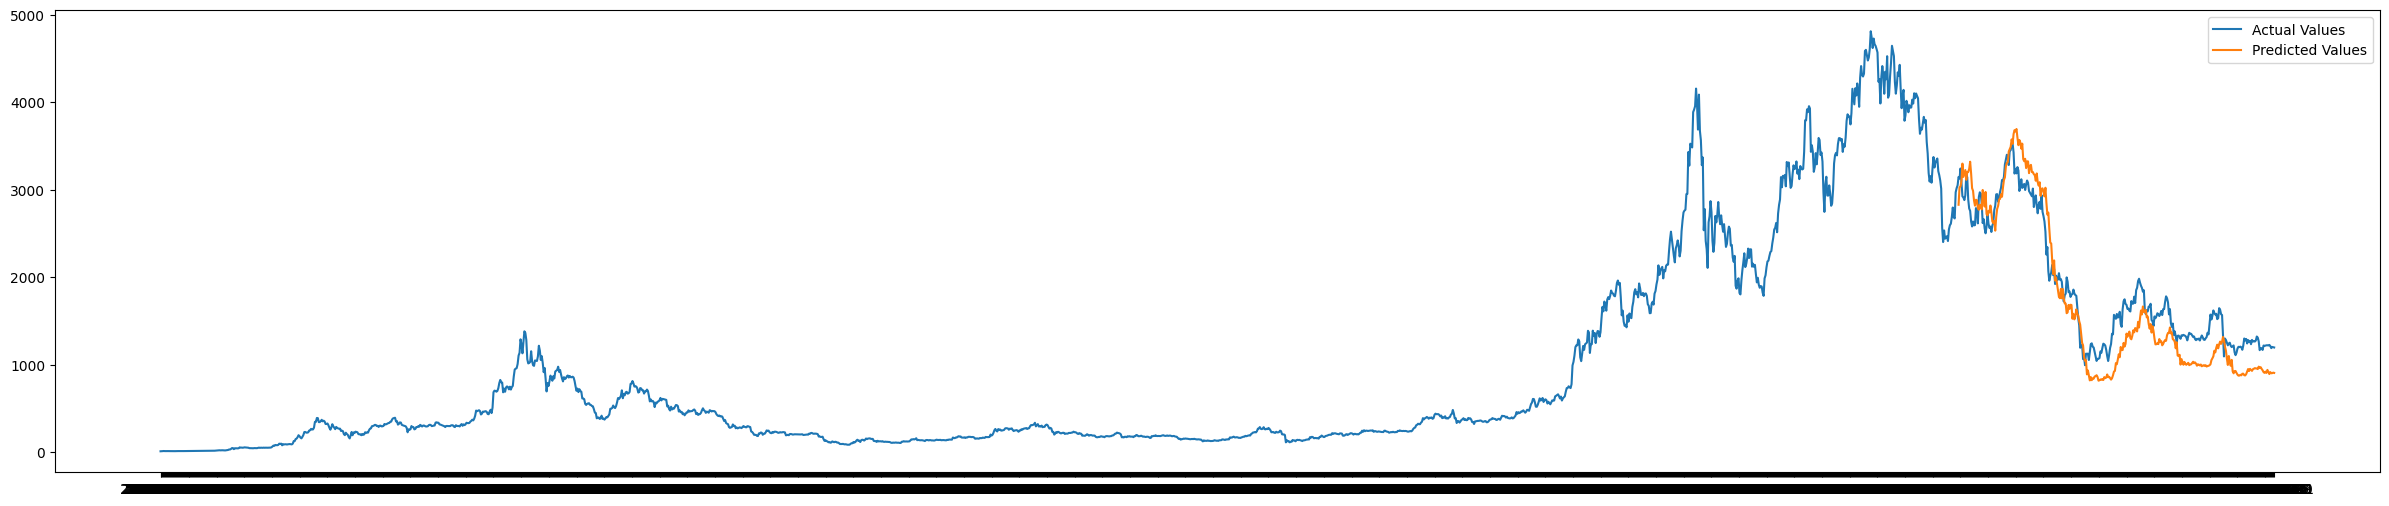

In [45]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1_HHO)
plt.legend(["Actual Values", "Predicted Values"])
plt.show()

### Errors

In [46]:
mse_HHO = np.mean((np.array(preds1_HHO[0]) - np.array(data1.iloc[-1*(len(preds1_HHO)):, 0]))**2)
print("mse  "+ str(mse_HHO))
print("rmse "+ str(np.sqrt(mse_HHO)))

mse  92750.32972727295
rmse 304.5493879935945


In [47]:
(np.array(test_y) - np.array(preds_HHO))[:, 0]

array([ 0.04625036,  0.02459434,  0.01870256,  0.02920705, -0.04525066,
       -0.04607481, -0.05691604, -0.07155996, -0.03661792, -0.00573954,
       -0.01266786, -0.07291157, -0.11130102, -0.08899534, -0.0791189 ,
       -0.08494601, -0.0500237 , -0.04675426, -0.06048763, -0.01892041,
       -0.00192294, -0.03238706,  0.01824054,  0.0299999 ,  0.03751648,
       -0.03315458, -0.065401  , -0.02995345, -0.08653085, -0.04571962,
       -0.02665072, -0.00642084, -0.02635992, -0.05326328, -0.03335729,
       -0.02483185, -0.00594619, -0.00436375,  0.04944471,  0.02688145,
        0.03441396,  0.02782183, -0.00548063,  0.00073668,  0.00624361,
        0.0212613 ,  0.01776195, -0.0013614 ,  0.00109316,  0.00510641,
        0.00856963,  0.01733188, -0.00974756, -0.0377407 , -0.00901539,
       -0.02564189, -0.00074452, -0.02310539, -0.05319994, -0.10015488,
       -0.09486993, -0.08517877, -0.05218538, -0.07284202, -0.1154295 ,
       -0.0918433 , -0.08477082, -0.06857466, -0.05948434, -0.05

In [48]:
err_test_HHO = (np.array(test_y) - np.array(preds_HHO))[:, 0]
mse_test_HHO = np.mean(err_test_HHO ** 2)
rmse_test_HHO = np.sqrt(mse_test_HHO)
mae_test_HHO = np.mean(np.abs(err_test_HHO))
mape_test_HHO = np.mean(np.abs(err_test_HHO) / np.array(test_y)[:, 0])
EHHON = pd.DataFrame([[mse_test_HHO, rmse_test_HHO, mae_test_HHO, mape_test_HHO]], columns = ["mse", "rmse", "mae", "mape"], index = ['HHO'])
EHHON

,mse,rmse,mae,mape
HHO,0.003664,0.060531,0.05453,0.164319


## Comparison Of All

### Convergence Curve

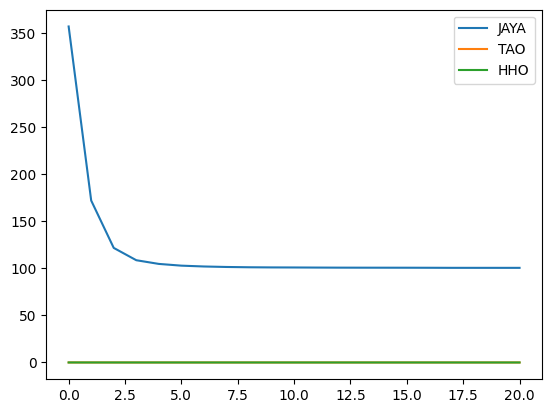

In [64]:
plt.figure()
plt.plot(ec_Jaya)
plt.plot(ec_Tao)
plt.plot(ec_HHO)
plt.legend(["JAYA", "TAO", "HHO"])
plt.show()


### Prediction

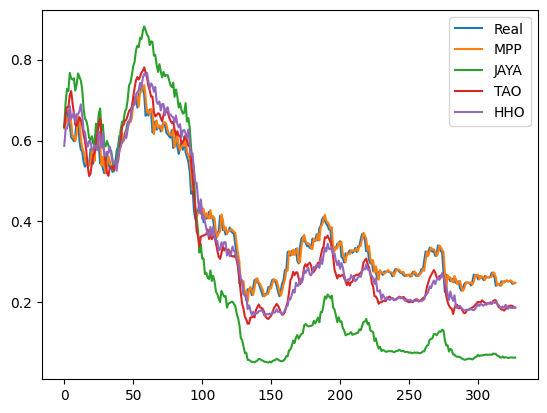

In [65]:
plt.figure()
plt.plot(np.array(test_y[9]))
plt.plot(pred_y_MPP)
plt.plot(np.array(preds_Jaya))
plt.plot(np.array(preds_Tao))
plt.plot(np.array(preds_HHO))
plt.legend(["Real", "MPP", "JAYA", "TAO", "HHO"])
plt.show()

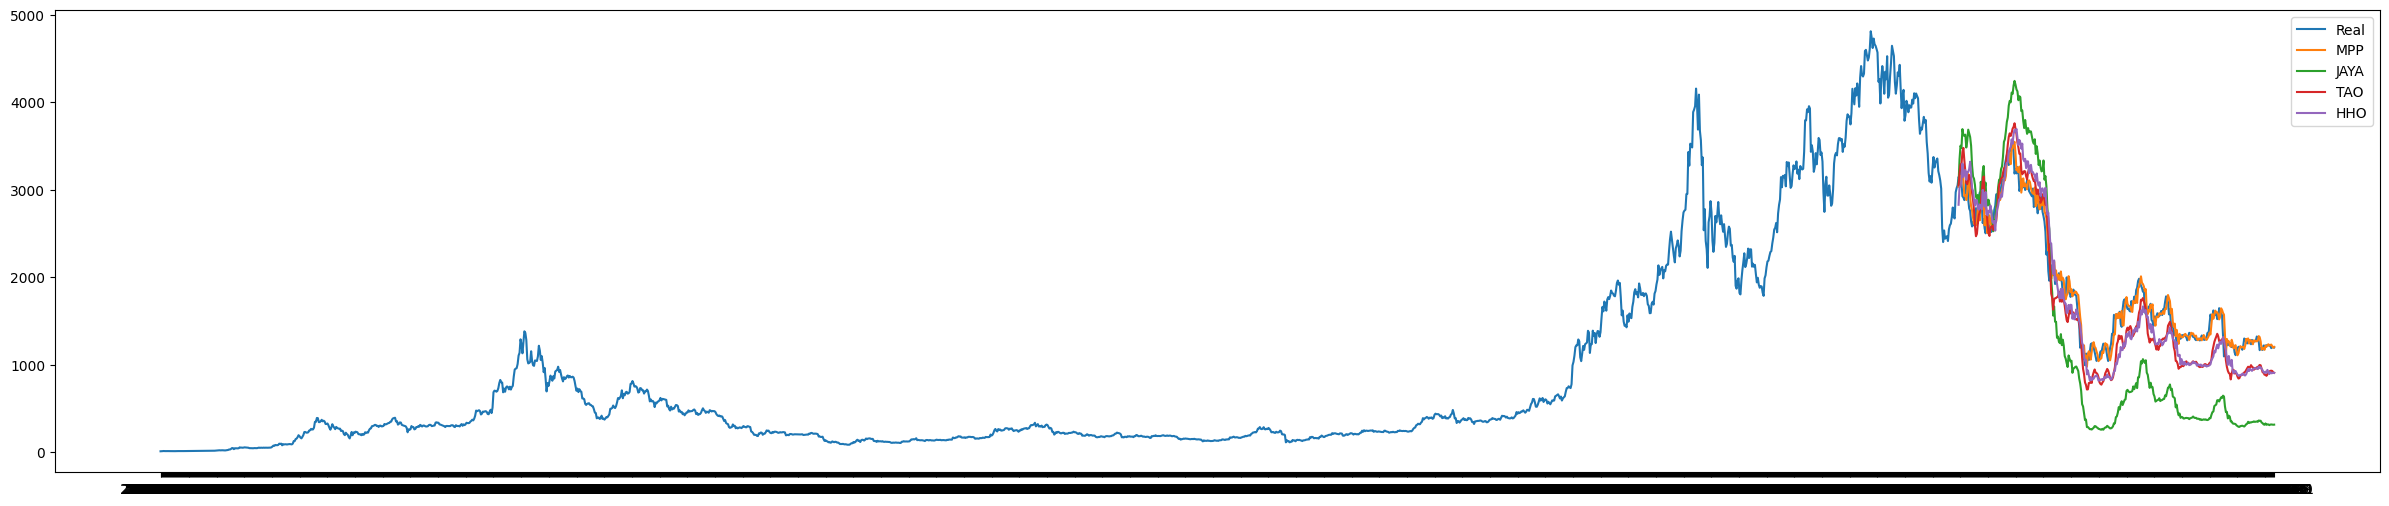

In [66]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1_MPP)
plt.plot(preds1_Jaya)
plt.plot(preds1_Tao)
plt.plot(preds1_HHO)
plt.legend(["Real", "MPP", "JAYA", "TAO", "HHO"])
plt.show()

### Errors

In [67]:
EN = pd.concat([MPPN, EJYN, ETAON, EHHON])
EN

,mse,rmse,mae,mape
MPPN,0.000314,0.017717,0.012726,0.034043
Jaya,0.028171,0.167841,0.158789,0.494879
TAON,0.003439,0.058642,0.053592,0.164856
HHO,0.003664,0.060531,0.054530,0.164319
